# 10 route problem


Airline Routing Problem Summary
Number of Routes: 10
Number of Flights: 6
Number of Tails: 3

Penalty Coefficients:
  A (Flight Coverage Constraint): 1.0
  B (Tail Assignment Constraint): 1.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 1.0
  Flight 2: Cf_2 = 1.0
  Flight 3: Cf_3 = 1.0
  Flight 4: Cf_4 = 1.0
  Flight 5: Cf_5 = 1.0
  Flight 6: Cf_6 = 1.0

Route Costs:
  Route 1: c_1 = 0.0
  Route 2: c_2 = 0.0
  Route 3: c_3 = 0.0
  Route 4: c_4 = 0.0
  Route 5: c_5 = 0.0
  Route 6: c_6 = 0.0
  Route 7: c_7 = 0.0
  Route 8: c_8 = 0.0
  Route 9: c_9 = 0.0
  Route 10: c_10 = 0.0

Flight-Route Incidence Matrix (afr):
[[1 0 0 1 0 0 1 0 0 1]
 [1 0 0 0 1 0 1 0 1 0]
 [0 1 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 0 1 0 0]]

Tail-Route Incidence Matrix (btr):
[[1 0 0 1 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 1 0 0 1 0]]

QUBO Linear Coefficients (h):
[-5. -5. -5. -5. -5. -3. -7. -7. -5. -5.]

QUBO Coupling Matrix (J):
[[0. 0. 0. 4. 2. 0. 

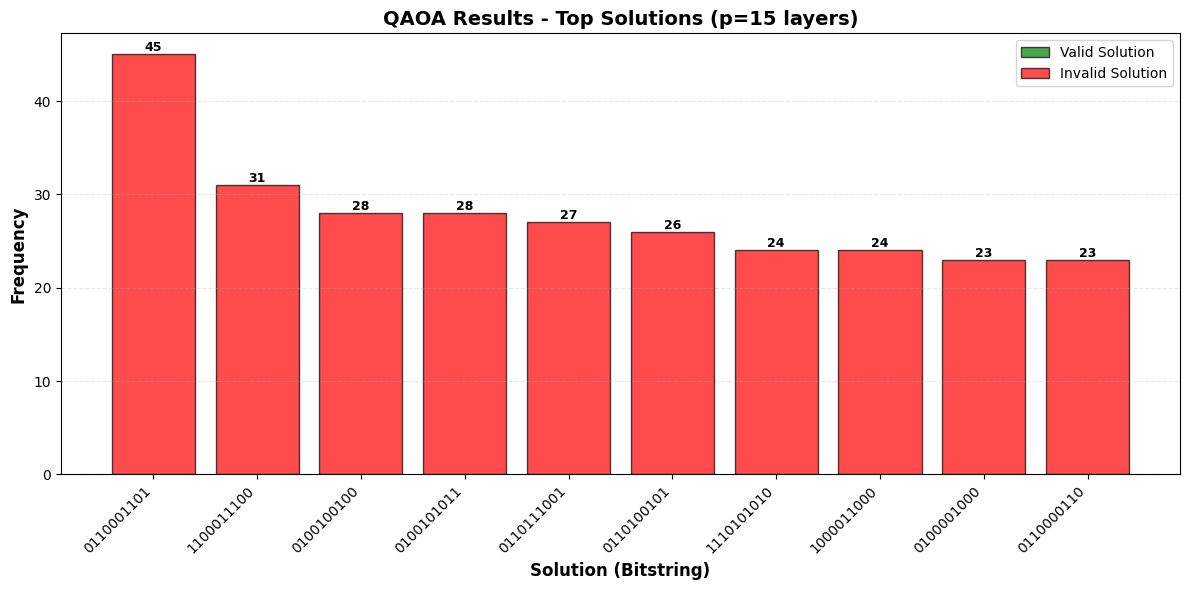


QAOA Histogram Summary
Total unique solutions found: 855
Displaying top 10 solutions
QAOA layers (p): 15
Valid solutions in top 10: 0/10


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=15 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [34]:
import numpy as np
from airlines_qaoa import Airlines

# --- 10 Qubit Airlines Dataset ---

# 1. Flight-Route Incidence Matrix (afr)
# Shape: (Num_Flights=6, Num_Routes=10)
# Rows are Flights (F0-F5), Columns are Routes (R0-R9)
afr = np.array([
    # R0 R1 R2 R3 R4 R5 R6 R7 R8 R9
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1], # F0
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], # F1
    [0, 1, 0, 1, 0, 0, 1, 1, 0, 0], # F2
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0], # F3
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 1], # F4
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]  # F5
])

# 2. Tail-Route Incidence Matrix (btr)
# Shape: (Num_Tails=3, Num_Routes=10)
# Rows are Tails (T0-T2), Columns are Routes (R0-R9)
btr = np.array([
    # R0 R1 R2 R3 R4 R5 R6 R7 R8 R9
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1], # Tail 0
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0], # Tail 1
    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0]  # Tail 2
])

# 3. Validation Logic (Why this works)
# If the solver picks R0, R1, R2 (Indices 0, 1, 2):
# - F0, F1 covered by R0
# - F2, F3 covered by R1
# - F4, F5 covered by R2
# - Tail 0 used by R0, Tail 1 by R1, Tail 2 by R2
# Result: Perfect Exact Cover.

# Parameters for the QAOA Instance
route_costs = np.zeros(10) # Assuming no specific route costs for this test
penalty_A = 1.0
penalty_B = 1.0
flight_penalties = np.ones(6)

# You can now pass these to your class:
qaoa = Airlines(afr, btr, route_costs, penalty_A, penalty_B, flight_penalties)

# --- Run QAOA ---
results = qaoa.build_qaoa(p_layers=15)

qaoa.problem_summary()

qaoa.build_qaoa(p_layers=15)
initial_params = [1.0] * 30  # 15 layers * 2 parameters per layer
results = qaoa.optimize(p_layers=15, initial_params=initial_params, shots=1024)
print(results['counts'])

solutions = qaoa.analyze_results(results['counts'], top_k=5)

qaoa.plot_qaoa_histogram(results, top_k=10)



Simulated Annealing Result:
Best Bitstring: 0010101000
Best Energy: -15.0000
Valid Solution: ✗


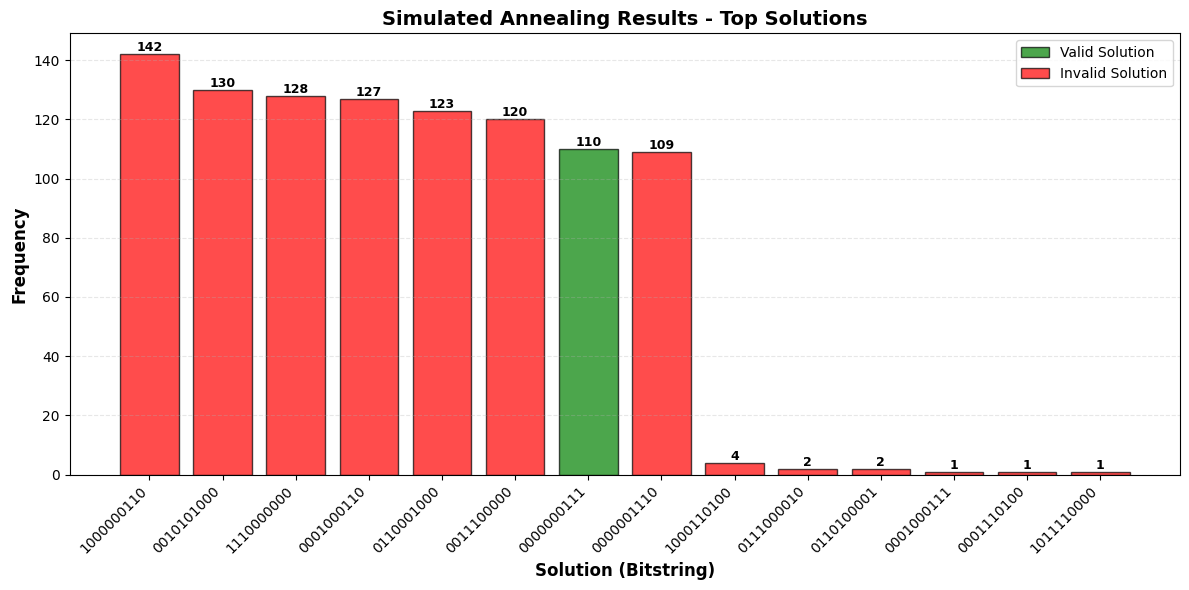


Simulated Annealing Histogram Summary
Total unique solutions found: 14
Displaying top 14 solutions
Valid solutions in top 20: 1/14


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [33]:
results = qaoa.simulated_annealing(num_reads=1000)
qaoa.plot_sa_histogram(results, top_k=20)